# Machine Learning with Decision Trees and Random Forests

In this project we will be exploring publicly available data from LendingClub.com. Lending Club is a service that connects borrowers with people who have money (investors). We will try to create a model that will help predict if a person has a high probability of paying the loan back.

In [69]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We will use lending data from 2007-2010 and try to classify and predict whether or not the borrower paid back their loan in full. 

The data set contains the following features:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [70]:
#Reading the data
loans = pd.read_csv('./data/loan_data.csv')

In [71]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [72]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [73]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis

Using quick visualisations, we can explore the relationship between different variables in the dataset. 

Let's start with a dual histogram of the FICO score of the borrowers, depending on the credit policy (i.e. if a borrower met the underlying criteria).

Text(0.5, 0, 'FICO')

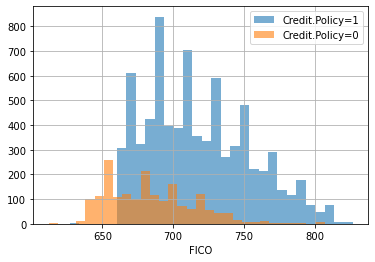

In [74]:
loans[loans['credit.policy']==1]['fico'].hist(bins=30,alpha=0.6,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(bins=30,alpha=0.6,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Checking out a similar histogram, based on the 'not.fully.paid' column.

Text(0.5, 0, 'FICO')

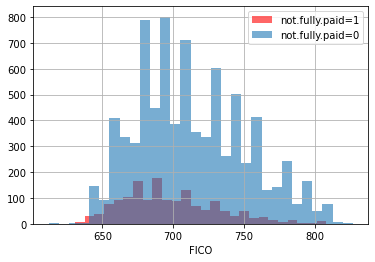

In [75]:
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30,alpha=0.6,label='not.fully.paid=1',color='red')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,alpha=0.6,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Let's visualize the counts of of loan purposes, based on whether a borrower fully paid the loan back or not. 

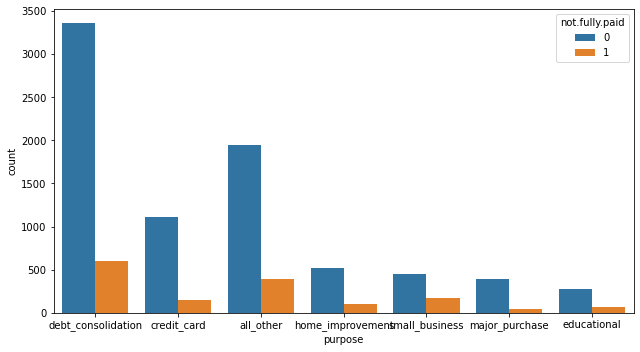

In [76]:
plt.figure(figsize=(9,5))
sns.countplot(x=loans['purpose'],hue=loans['not.fully.paid'])
plt.tight_layout()

Let's see the trend between FICO score and interest rate.

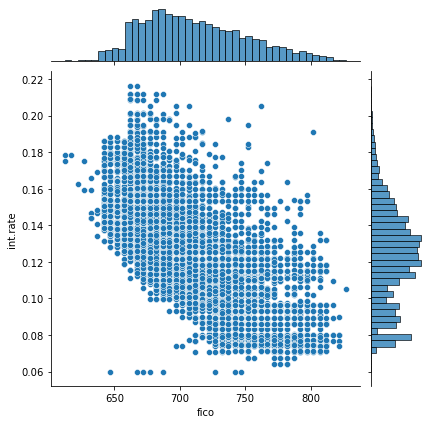

In [77]:
sns.jointplot(x='fico',y='int.rate',data=loans)

## Model Building

The _purpose_ column is categorical.

That means we need to transform them using dummy variables so sklearn will be able to understand them. 

In [78]:
#Creating a list of all categorical features.
cat_feats = ['purpose']

In [79]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

### Train Test Split

In [80]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [81]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [82]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Training a Decision Tree Model

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtree= DecisionTreeClassifier()

In [85]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

In [86]:
predictions = dtree.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2400
           1       0.21      0.22      0.21       474

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.74      2874



In [89]:
print(confusion_matrix(y_test,predictions))

[[1997  403]
 [ 369  105]]


### Training the Random Forest model

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier()

In [92]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

### Predictions and Evaluation of Random Forest

In [93]:
predictions = rfc.predict(X_test)

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2400
           1       0.47      0.03      0.06       474

    accuracy                           0.83      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.78      0.83      0.77      2874



In [95]:
print(confusion_matrix(y_test,predictions))

[[2384   16]
 [ 460   14]]


We can see that the random forest performed somewhat better than the decision tree model.